<a href="https://colab.research.google.com/github/CresGallego/neural_network/blob/main/neural_network_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import tensorflow andother packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import time

# desired accuracy of the model
accuracy_target = 0.96

# load data from Mnist
data = tf.keras.datasets.fashion_mnist

# extract data to training and test data sets
(training_images, training_labels),(test_images, test_labels) = data.load_data()

# normalize the data
training_images = training_images / 255.0
test_images = test_images / 255.0


# create a callback to stop the training of the model when accuracy reached 93% (to avoid over fitting)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if(logs.get('accuracy')>accuracy_target):
      self.model.stop_training = True
      print(f"\nHave reached the {accuracy_target*100:}% accuracy, so halting the the training!")

callback = myCallback()

# design the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model with call back
start_time = time.time()
model.fit(training_images, training_labels, epochs=50,callbacks=[callback] )
end_time = time.time()
print("\nTraining took {} seconds to reach the {}% accuracy desired.".format(round(end_time-start_time), round(accuracy_target*100)))

# evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Evaluation Result")
print(f"Accuracy : {accuracy*100:.2f}%")
print(f"Loss     : {loss*100:.2f}%")



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7811 - loss: 0.6302
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8626 - loss: 0.3860
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8793 - loss: 0.3298
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8864 - loss: 0.3144
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8945 - loss: 0.2887
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8930 - loss: 0.2877
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9005 - loss: 0.2657
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9050 - loss: 0.2582
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9092 - loss: 0.2475
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9113 - loss: 0.2359
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9136 - loss: 0.2312
Epoch 12/50
1875/1875 ━━━━━━━━

Test image number : 7464
Category Names : ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted label index number :9
Predicted label name : Ankle Boot
Actual label : 9
Actual label name : Ankle Boot
Probability : 100%

The probabilities of classifications for test image number '7464' is the following:
[1.9736916e-20 1.2493116e-19 5.8806911e-23 2.3789235e-17 3.0937636e-26
 9.8094158e-17 4.8430577e-19 5.3444062e-04 1.7344920e-25 9.9946553e-01]

Test image number '7464' is predicted label to be '9' and the actual label is '9'.
Test image number '7464' predicted name is 'Ankle Boot' and the actual name is 'Ankle Boot'!
Prediction is 'Correct' and with '100%' probability


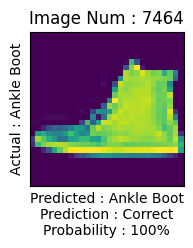

In [5]:
# RUN PREDICTIONS
# to randomly use any of the 10,000 test images for prediction, make avariable to store the random imge number
test_image_number = rand.randint(0, 10000)
print(f"Test image number : {test_image_number}")

# variable to store the array of the 10 category names
category_name = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag","Ankle Boot"]
print(f"Category Names : {category_name}")

# variable to store the array of 10 probabilities of randomly selected image being predicted by calling the predict() method of the model
classifications = model.predict(test_images)

# using numpy's argmax() method to get the index number of the highest probability in classification array
predicted_label = np.argmax(classifications[test_image_number])
print(f"Predicted label index number :{predicted_label}")

# extract predicted label name using the predicted_label as the index to locate the position in the array of category name
predicted_label_name = category_name[predicted_label]
print(f"Predicted label name : {predicted_label_name}")

# to extract the actual label (number 0 to 9) of the image (of test dataset) being predicted
test_label = test_labels[test_image_number]
print(f"Actual label : {test_label}")

# to extract the actual label name of the image
actual_label_name = category_name[test_label]
print(f"Actual label name : {actual_label_name}")

# to get the value of the probability scorein classification array using test_image_number as outer index and predicted_
probability = round(classifications[test_image_number][predicted_label]*100)
print(f"Probability : {probability}%")

# define a function to tell if the prediction is correct or not, probability
def is_predict_correct(predicted_label, test_label):
  if predicted_label == test_label:
    answer = "Correct"
  else:
    answer ="Wrong"

  return answer

answer = is_predict_correct(predicted_label, test_label) #unpack the return values and save as variables

print("\nThe probabilities of classifications for test image number '{}' is the following:\n{}".format(test_image_number,classifications[test_image_number]))
print("\nTest image number '{}' is predicted label to be '{}' and the actual label is '{}'.".format(test_image_number, predicted_label, test_label))
print("Test image number '{}' predicted name is '{}' and the actual name is '{}'!".format(test_image_number, predicted_label_name, actual_label_name))
print("Prediction is '{}' and with '{}%' probability".format(answer, probability))

# show the predicted image
plt.figure(figsize=(2,2))
plt.imshow(test_images[test_image_number])
plt.xticks([])
plt.yticks([])
plt.title("Image Num : {}". format(test_image_number))
plt.xlabel(f"Predicted : {predicted_label_name}\nPrediction : {answer}\nProbability : {probability}%")
plt.ylabel("Actual : {}".format(actual_label_name))
plt.show()